In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Reading the dataset

In [2]:
# Read the file "Boston_housing.csv" as a dataframe

df = pd.read_csv("Boston_housing.csv")
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Predictors & Response variables

Select the following columns as predictors
- crim
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat

#### Select the 'medv' column as response variable

In [3]:
# Select a subdataframe of predictors mentioned above

X = df[['crim','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]

# Normalize the values of the dataframe 

X_norm = preprocessing.normalize(X)

# Select medv as the response variable

y = df['medv']

### Split the dataset into train and validation sets

Keep the test size as 30% of the dataset, and use ```random_state```=31

In [4]:
### edTest(test_random) ###
# Split the data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_norm,y,test_size=0.3,random_state=31)


### Multi-linear Regression Analysis

In [5]:
#Fit a linear regression model on the training data

lreg = LinearRegression()
lreg.fit(X_train,y_train)

# Predict on the validation set

y_val_pred = lreg.predict(X_val)

### Computing the MSE for Multi-Linear Regression

In [6]:
# Use the mean_squared_error function to compute the validation mse

mse = mean_squared_error(y_val,y_val_pred)

# print the MSE value

print ("Multi-linear regression validation MSE is", mse)

Multi-linear regression validation MSE is 20.133951375165328


### Obtaining the coefficients of the predictors

In [7]:
#make a dictionary of the coefficients along with the predictors as keys

lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

#Linear regression coefficient values to plot

lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())

In [8]:
lreg_coef

{'crim': -92.8379956362872,
 'indus': 34.40502056315186,
 'nox': -6065.499520555732,
 'rm': 3055.9160025028173,
 'age': -4.938036130799326,
 'dis': -526.9067702420849,
 'rad': 171.5487903972316,
 'tax': 8.089192348451379,
 'ptratio': -442.042911975438,
 'black': 13.553417095972803,
 'lstat': -228.20776805254192}

### Implementing Lasso regularization

In [9]:
# Now, you will implement the lasso regularisation

# Use alpha = 0.008

lasso_reg = Lasso(alpha=0.008)

#Fit on training data

lasso_reg.fit(X_train,y_train)

#Make a prediction on the validation data using the above trained model

y_val_pred =lasso_reg.predict(X_val)


### Computing the MSE with Lasso regularization

In [10]:
# Again, calculate the validation MSE & print it

mse_lasso = mean_squared_error(y_val,y_val_pred)

print ("Lasso validation MSE is", mse_lasso)

Lasso validation MSE is 31.676774400084444


### Obtaining the coefficients of the predictors

In [11]:
# Use the helper code below to make a dictionary of the predictors along with 
# the coefficients associated with them

lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 

#Lasso regularisation coefficient values to plot

lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

### Implementing Ridge regularization

In [12]:
# Now, we do the same as above, but we use L2 regularisation

# Again, use alpha=0.008

ridgeReg = Ridge(alpha=0.008)

#Fit the model in the training data
ridgeReg.fit(X_train,y_train)

#Predict the model on the validation data
y_val_pred = ridgeReg.predict(X_val)


### Computing the MSE with Ridge regularization

In [13]:
### edTest(test_mse) ###

# Calculate the validation MSE & print it

mse_ridge = mean_squared_error(y_val,y_val_pred)
print ("Ridge validation MSE is", mse_ridge)

Ridge validation MSE is 28.053659010180827


### Obtaining the coefficients of the predictors

In [14]:
# Use the helper code below to make a dictionary of the predictors along 
# with the coefficients associated with them 

ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 

#Ridge regularisation coefficient values to plot

ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())

### Plotting the graph

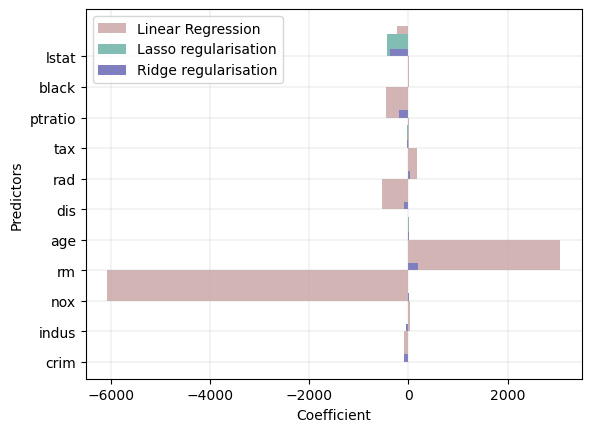

In [15]:
# Use the helper code below to visualise your results

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.xlim(-6500,3500)
plt.show()

### Compare the results of linear regression with that of lasso and ridge regularization.

Your answer here

### After marking, change the alpha values to 1000. What happens to the coefficients when alpha increases?

Your answer here